# ¿Qué determina si un videojuego tiene éxito o no?

In [32]:
# Carga las librerías que ocupaste
import pandas as pd
from matplotlib import pyplot as plt


In [33]:
# Carga el archivo
try:
    games = pd.read_csv("games.csv")
except:
    games = pd.read_csv("/datasets/games.csv")

In [34]:
# Imprime una descripción de los datos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [124]:
# Imprime una muestra de los datos
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                wii sports      wii           2006.0        Sports     41.36   
1         super mario bros.      nes           1985.0      Platform     29.08   
2            mario kart wii      wii           2008.0        Racing     15.68   
3         wii sports resort      wii           2009.0        Sports     15.61   
4  pokemon red/pokemon blue       gb           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  tot_income  
0     28.96      3.77         8.45          76.0          8      E       82.54  
1      3.58      6.81         0.77           NaN        NaN    NaN       40.24  
2     12.76      3.79         3.29          82.0        8.3      E       35.52  
3     10.93      3.28         2.95          80.0          8      E       32.77  
4      8.89     10.22         1.00           NaN        NaN    NaN       31.38  


In [43]:
# Revisa las distribuciones de las columnas númericas
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,tot_income
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,82.540000


- Cambiemos los nombres de las columnas a minúsculas.
- La columna 'user_score' es de tipo 'object' revisemos más adelante.

- Hay videojuegos que tienen duplicados que pudieran ser algunas remasterizaciones que se hacen del mismo.
- Al parecer no tenemos datos duplicados en la columna 'platform'
- Tenemos un dato 'tbd' que indica que la calificación está por determinarse.

### Corrige los datos

In [123]:
# Cambia los nombres de las columnas a minúsculas para tener un mejor manejo de ellos.
games.columns = games.columns.str.lower()
# Cambia los nombres de la columna 'name' y 'platform' a minuscula
games['name'] = games.name.str.lower()
games['platform'] = games.platform.str.lower()

## Revisa las columnas que pudieran necesitar mayor investigación

In [94]:
# Revisa datos distintos de números en la columna 'user_score'
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Enriquece los datos


In [40]:
# Creemos una columna que contenga la suma de los ingresos de todas las regiones para cada videojuego
games['tot_income'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [24]:
games.year_of_release.max()

2016.0

## Veamos si tenemos duplicados.

In [25]:
# Revisa si tenemos duplicados
games[games.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [26]:
# Investiga porqué pudieramos tener duplicados.
games.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [27]:
games.query('name.isna() and platform == "GEN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Veamos más adelante si estos juegos aparentemente duplicados nos afectan estos videojuegos a nuestro análisis.


In [96]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'tot_income'],
      dtype='object')

In [ ]:
# Revisa los registros únicos de la columna 'user_score' y 'rating', tenemos tipo de datos 'object'
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Revisa ¿Cuántos videojuegos se lanzaron cada año

In [ ]:
# Cuenta el número de videojuegos que se lanzaron cada año.
games.groupby('year_of_release')['name'].count().sort_values(ascending=False)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: name, dtype: int64

## Revisemos ¿Cuánto ha vendido cada plataforma? 

In [ ]:
# Agrupa por la columna 'platform' y suma los totales de ventas de todos los videojuegos
print(games.groupby('platform')['tot_income'].sum().sort_values(ascending=False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: tot_income, dtype: float64


## Revisa cómo se comportaron las ventas de las plataformas con mayores ventas a lo largo de los años.

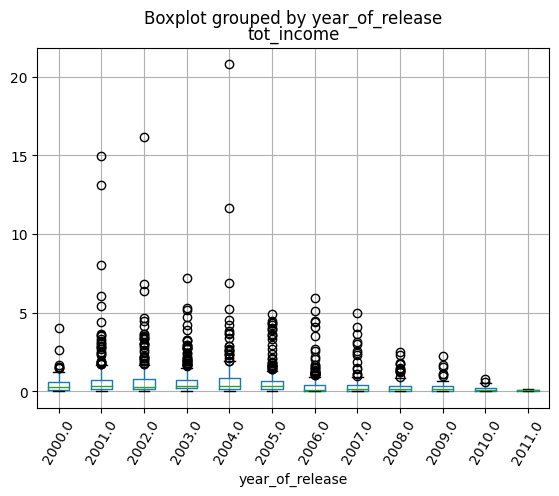

In [102]:
# plt.boxplot(games.query('platform == "PS2"')[['year_of_release', 'tot_income']], )
games.query('platform == "PS2"').boxplot(column='tot_income', by='year_of_release')
plt.xticks(rotation = 60)
plt.show()

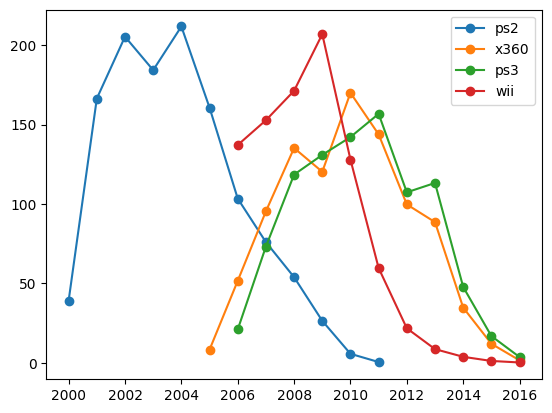

<Figure size 1500x1500 with 0 Axes>

In [141]:
solds_ps2 = games.query('platform == "ps2"').pivot_table(index='year_of_release', values='tot_income', aggfunc='sum')
solds_x360 = games.query('platform == "x360"').pivot_table(index='year_of_release', values='tot_income', aggfunc='sum')
solds_ps3 = games.query('platform == "ps3"').pivot_table(index='year_of_release', values='tot_income', aggfunc='sum')
solds_wii = games.query('platform == "wii"').pivot_table(index='year_of_release', values='tot_income', aggfunc='sum')
solds_ds = games.query('platform == "ds"').pivot_table(index='year_of_release', values='tot_income', aggfunc='sum')
solds_ps = games.query('platform == "ps"').pivot_table(index='year_of_release', values='tot_income', aggfunc='sum')
plt.plot(solds_ps2, 'o-')
plt.plot(solds_x360, 'o-')
plt.plot(solds_ps3, 'o-')
plt.plot(solds_wii, 'o-')
# plt.plot(solds_ds, 'o-')
# plt.plot(solds_ps, 'o-')
plt.legend(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'])
plt.figure(figsize=(15,15))
plt.show()

In [54]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'tot_income'],
      dtype='object')